In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df. shape

(962, 2)

# Exploring categories

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

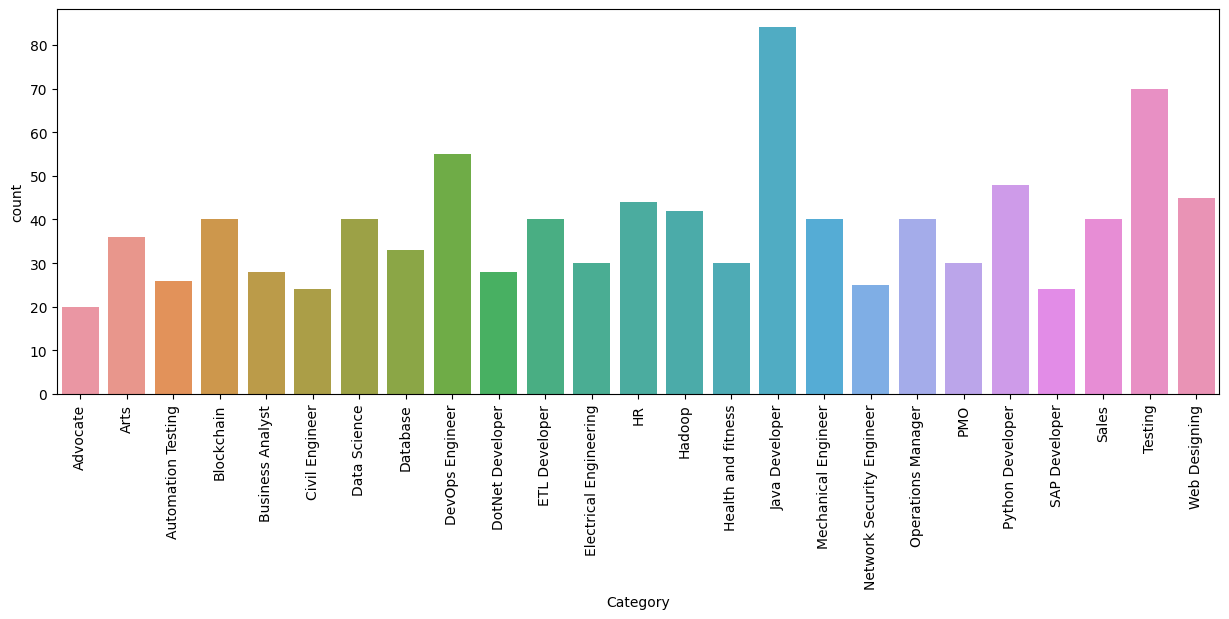

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Category' to categorical
df['Category'] = df['Category'].astype('category')

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df['Category'].unique()

['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing', ..., 'Hadoop', 'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']
Length: 25
Categories (25, object): ['Advocate', 'Arts', 'Automation Testing', 'Blockchain', ...,
                          'SAP Developer', 'Sales', 'Testing', 'Web Designing']

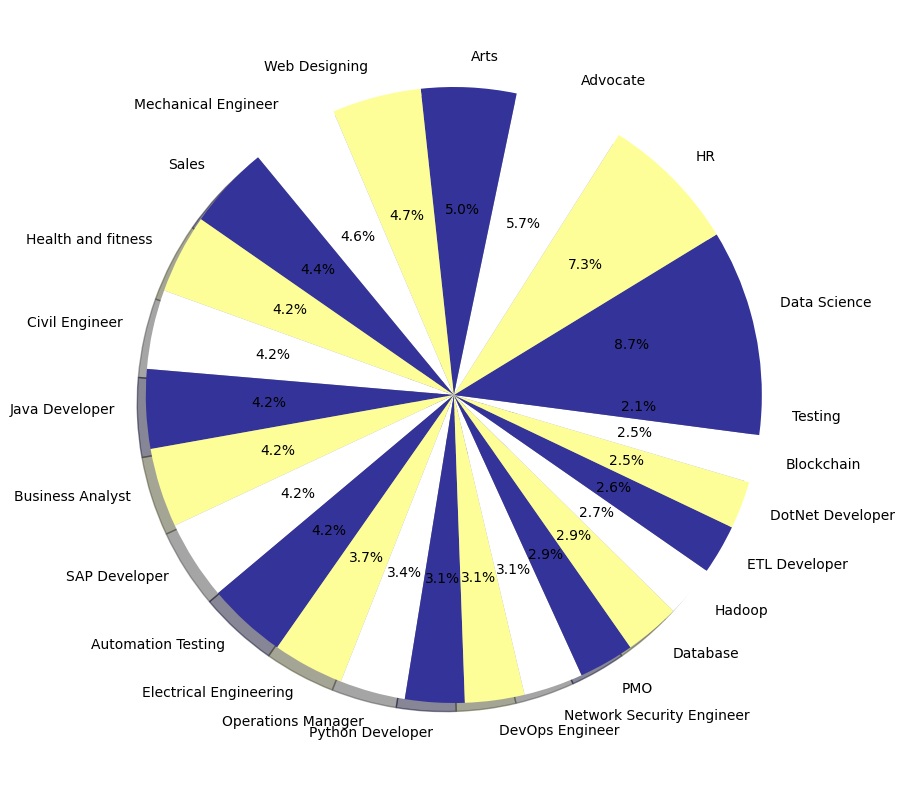

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.terrain(np. linspace(0,1,3)))
plt.show()

# Exploring Resume

In [ ]:
df['Category'][0]

'Data Science'

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
#Cleaning Data
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s',' ',txt)
    cleanText = re.sub('RT|cc',' ',cleanText)
    cleanText = re.sub('#\S+\s',' ',cleanText)
    cleanText = re.sub('@\S+',' ',cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText = re.sub('\s+',' ',cleanText)
    cleanText = re.sub('[%s]'% re.escape("""!" #$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanText)
    return cleanText

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df['Resume'][0]

'Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate   Ernst   Young LLP Skill Details JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and Dispute Services Assurance TEC

In [ ]:
#Using label encoder to convert words into categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df.Category.unique()
#array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       #'Mechanical Engineer', 'Sales', 'Health and fitness',
       #'Civil Engineer', 'Java Developer', 'Business Analyst',
       #'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       #'Operations Manager', 'Python Developer', 'DevOps Engineer',
       #'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       #'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      #dtype=object)

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
#Vactorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

Training and classification of the model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(requiredText,df['Category'],test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(769, 7351)

In [ ]:
X_test.shape

(193, 7351)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [ ]:
#KNeighborsClassifier

# Create a One-vs-Rest classifier using KNeighborsClassifier
ovr_knn_classifier = OneVsRestClassifier(KNeighborsClassifier())

# Train the One-vs-Rest classifiers
ovr_knn_classifier.fit(X_train,y_train)


# Make predictions
ypred = ovr_knn_classifier.predict(X_test)

# Evaluate accuracy for Decision Tree
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [ ]:
# Performance Measurement for K-Nearest Neighbors
def print_performance_metrics(y_true, y_pred, prefix):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{prefix} Precision: {precision:.4f}")
    print(f"{prefix} Recall: {recall:.4f}")
    print(f"{prefix} F1 Score: {f1:.4f}")

# Print Performance Metrics for K-Nearest Neighbors
print_performance_metrics(y_test, ypred , "K-Nearest Neighbors")

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, ypred )
print("Confusion Matrix for K-Nearest Neighbors:")
print(conf_matrix_dt)

K-Nearest Neighbors Precision: 0.9874
K-Nearest Neighbors Recall: 0.9845
K-Nearest Neighbors F1 Score: 0.9839
Confusion Matrix for K-Nearest Neighbors:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  

In [ ]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [ ]:
#DecisionTreeClassifier

# Create binary classifiers
dt_classifier = DecisionTreeClassifier()

# Create a One-vs-Rest classifier using DecisionTree
ovr_dt_classifier = OneVsRestClassifier(dt_classifier)

# Train the One-vs-Rest classifiers
ovr_dt_classifier.fit(X_train, y_train)

# Make predictions
y_dpred_dt = ovr_dt_classifier.predict(X_test)

# Evaluate accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, y_dpred_dt)
print("Accuracy for Decision Tree:", accuracy_dt)


Accuracy for Decision Tree: 0.9948186528497409


In [ ]:
# Performance Measurement for Decision Tree
def print_performance_metrics(y_true, y_pred, prefix):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{prefix} Precision: {precision:.4f}")
    print(f"{prefix} Recall: {recall:.4f}")
    print(f"{prefix} F1 Score: {f1:.4f}")

# Print Performance Metrics for Decision Tree
print_performance_metrics(y_test, y_dpred_dt, "Decision Tree")

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_dpred_dt)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix_dt)

Decision Tree Precision: 0.9957
Decision Tree Recall: 0.9948
Decision Tree F1 Score: 0.9950
Confusion Matrix for Decision Tree:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   1]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  

In [ ]:
y_dpred_dt

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 24,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

In [ ]:
#RandomForestClassifier

# Create binary classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create One-vs-Rest classifiers using RandomForest
ovr_rf_classifier = OneVsRestClassifier(rf_classifier)

# Train the One-vs-Rest classifiers
ovr_rf_classifier.fit(X_train, y_train)

# Make predictions
y_dpred_rf = ovr_rf_classifier.predict(X_test)

# Evaluate accuracy for RandomForest
accuracy_rf = accuracy_score(y_test, y_dpred_rf)
print("Accuracy for RandomForest:", accuracy_rf)

Accuracy for RandomForest: 0.9948186528497409


In [ ]:
# Performance Measurement for RandomForestClassifier
def print_performance_metrics(y_true, y_pred, prefix):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{prefix} Precision: {precision:.4f}")
    print(f"{prefix} Recall: {recall:.4f}")
    print(f"{prefix} F1 Score: {f1:.4f}")

# Print Performance Metrics for RandomForestClassifier
print_performance_metrics(y_test, y_dpred_rf, "RandomForestClassifier")

# Confusion Matrix for RandomForestClassifier
conf_matrix_dt = confusion_matrix(y_test, y_dpred_rf)
print("Confusion Matrix for RandomForestClassifier:")
print(conf_matrix_dt)

RandomForestClassifier Precision: 0.9955
RandomForestClassifier Recall: 0.9948
RandomForestClassifier F1 Score: 0.9949
Confusion Matrix for RandomForestClassifier:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  

In [ ]:
 y_dpred_rf

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23])

Cross-Validation

In [ ]:

from sklearn.model_selection import  cross_val_score, StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

cv_knn = cross_val_score(ovr_knn_classifier, requiredText,df['Category'], cv=stratified_cv, scoring='accuracy').mean()
cv_dt = cross_val_score(ovr_dt_classifier, requiredText,df['Category'], cv=stratified_cv, scoring='accuracy').mean()
cv_rf = cross_val_score(ovr_rf_classifier, requiredText,df['Category'], cv=stratified_cv, scoring='accuracy').mean()

In [ ]:
# Comparative Analysis
print("Cross-Validation Accuracy for KNN:", cv_knn)
print("Cross-Validation Accuracy for Decision Tree:", cv_dt)
print("Cross-Validation Accuracy for RandomForest:", cv_rf)

Cross-Validation Accuracy for KNN: 0.9781627806563039
Cross-Validation Accuracy for Decision Tree: 0.9948024611398963
Cross-Validation Accuracy for RandomForest: 0.9916882556131259


In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(ovr_knn_classifier, open('clf.pkl', 'wb'))

In [ ]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""




In [ ]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


Bias and Variance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame

X, y = requiredText, df['Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Convert sparse matrices to dense arrays
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Convert dense arrays to NumPy arrays
X_train_np = np.array(X_train_dense)
X_test_np = np.array(X_test_dense)

# Convert labels to NumPy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# Define models
decision_tree_model = DecisionTreeClassifier(random_state=1)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=1)
knn_model = KNeighborsClassifier()

# Bias-variance decomposition for Decision Tree
mse_dt, bias_dt, var_dt = bias_variance_decomp(decision_tree_model, X_train_np, y_train_np, X_test_np, y_test_np, loss='0-1_loss', num_rounds=200, random_seed=1)
print("Bias-variance decomposition for Decision Tree")
print("Decision Tree - 0-1 Loss:", mse_dt)
print("Decision Tree - Bias:", bias_dt)
print("Decision Tree - Variance:", var_dt)



Bias-variance decomposition for Decision Tree
Decision Tree - 0-1 Loss: 0.020723270440251573
Decision Tree - Bias: 0.0031446540880503146
Decision Tree - Variance: 0.020628930817610063


In [ ]:
# Bias-variance decomposition for RandomForest
mse_rf, bias_rf, var_rf = bias_variance_decomp(random_forest_model, X_train_np, y_train_np, X_test_np, y_test_np, loss='0-1_loss', num_rounds=200, random_seed=1)
print("Bias-variance decomposition for RandomForest")
print("Random Forest - 0-1 Loss:", mse_rf)
print("Random Forest - Bias:", bias_rf)
print("Random Forest - Variance:", var_rf)

Bias-variance decomposition for RandomForest
Random Forest - 0-1 Loss: 0.017830188679245282
Random Forest - Bias: 0.0031446540880503146
Random Forest - Variance: 0.015455974842767296


In [ ]:
# Bias-variance decomposition for K-Nearest Neighbors
mse_knn, bias_knn, var_knn = bias_variance_decomp(knn_model, X_train_np, y_train_np, X_test_np, y_test_np, loss='0-1_loss', num_rounds=200, random_seed=1)
print("Bias-variance decomposition for K-Nearest Neighbors")
print("K-Nearest Neighbors - 0-1 Loss:", mse_knn)
print("K-Nearest Neighbors - Bias:", bias_knn)
print("K-Nearest Neighbors - Variance:", var_knn)

Bias-variance decomposition for K-Nearest Neighbors
K-Nearest Neighbors - 0-1 Loss: 0.04679245283018868
K-Nearest Neighbors - Bias: 0.025157232704402517
K-Nearest Neighbors - Variance: 0.03251572327044025
